In [58]:
!pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [59]:
#import library yang digunakan untuk clustering
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import MinMaxScaler

In [60]:
dataframe = pd.read_csv("https://drive.google.com/uc?export=download&id=1WySfFNB2nZp-W_hGgTL76EGCwUe-8ykL")
dataframe.head()

,No.,Inisial,Nama Nasabah,Asuransi Kebakaran,Asuransi Kecelakaan,Asuransi Kesehatan
0,1,P1,Sari Adelia,1,3,2
1,2,P2,Fransiska,1,1,4
2,3,P3,Immanuel,2,4,5
3,4,P4,Lisda,3,3,1
4,5,P5,Mhd. Andy,2,1,4


In [61]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   No.                  55 non-null     int64 
 1   Inisial              55 non-null     object
 2   Nama Nasabah         55 non-null     object
 3   Asuransi Kebakaran   55 non-null     int64 
 4   Asuransi Kecelakaan  55 non-null     int64 
 5   Asuransi Kesehatan   55 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 2.7+ KB


In [62]:
df = dataframe.drop(["No.","Inisial","Nama Nasabah"], axis=1)
df.head()

,Asuransi Kebakaran,Asuransi Kecelakaan,Asuransi Kesehatan
0,1,3,2
1,1,1,4
2,2,4,5
3,3,3,1
4,2,1,4


In [63]:
df_x = df.iloc[:, 0:3]
df_x.head()

,Asuransi Kebakaran,Asuransi Kecelakaan,Asuransi Kesehatan
0,1,3,2
1,1,1,4
2,2,4,5
3,3,3,1
4,2,1,4


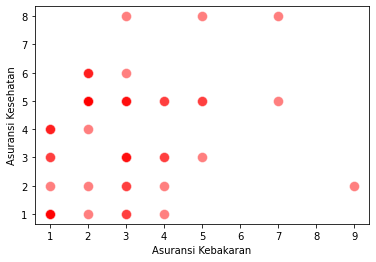

In [64]:
sns.scatterplot(x="Asuransi Kebakaran", y="Asuransi Kesehatan", data=df, s=100, color="red", alpha=0.5)
plt.show()

In [65]:
x_array = np.array(df_x)
print(x_array)

[[1 3 2]
 [1 1 4]
 [2 4 5]
 [3 3 1]
 [2 1 4]
 [2 2 1]
 [1 1 1]
 [1 5 3]
 [3 5 2]
 [4 2 3]
 [2 2 2]
 [3 3 1]
 [4 5 3]
 [4 4 2]
 [3 5 5]
 [3 4 5]
 [1 1 4]
 [2 5 5]
 [5 3 3]
 [2 1 5]
 [1 1 4]
 [4 5 5]
 [3 4 5]
 [1 1 1]
 [2 5 5]
 [1 1 1]
 [5 5 5]
 [3 1 3]
 [2 1 5]
 [1 2 1]
 [1 1 3]
 [2 5 5]
 [3 5 5]
 [9 3 2]
 [5 7 8]
 [2 4 6]
 [3 8 3]
 [1 6 1]
 [2 5 5]
 [5 5 5]
 [4 5 5]
 [3 7 8]
 [2 4 6]
 [2 5 5]
 [3 6 3]
 [2 1 5]
 [1 3 1]
 [4 1 1]
 [7 5 5]
 [3 5 2]
 [2 5 5]
 [3 5 3]
 [7 9 8]
 [2 4 6]
 [3 6 6]]


In [66]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled

array([[0.        , 0.25      , 0.14285714],
       [0.        , 0.        , 0.42857143],
       [0.125     , 0.375     , 0.57142857],
       [0.25      , 0.25      , 0.        ],
       [0.125     , 0.        , 0.42857143],
       [0.125     , 0.125     , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.5       , 0.28571429],
       [0.25      , 0.5       , 0.14285714],
       [0.375     , 0.125     , 0.28571429],
       [0.125     , 0.125     , 0.14285714],
       [0.25      , 0.25      , 0.        ],
       [0.375     , 0.5       , 0.28571429],
       [0.375     , 0.375     , 0.14285714],
       [0.25      , 0.5       , 0.57142857],
       [0.25      , 0.375     , 0.57142857],
       [0.        , 0.        , 0.42857143],
       [0.125     , 0.5       , 0.57142857],
       [0.5       , 0.25      , 0.28571429],
       [0.125     , 0.        , 0.57142857],
       [0.        , 0.        , 0.42857143],
       [0.375     , 0.5       , 0.57142857],
       [0.

**K-Means**

In [67]:
#Menentukan dan mengkonfigurasi fungsi k-means
kmeans = KMeans(n_clusters = 3, random_state=123)

In [68]:
#Menentukan cluster dari data
kmeans.fit(x_scaled)
print(kmeans.cluster_centers_)

[[0.2826087  0.51630435 0.65217391]
 [0.09210526 0.05263158 0.2406015 ]
 [0.30769231 0.46153846 0.17582418]]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [69]:
#Menambahkan kolom cluster dalam data frame 
df["cluster"] = kmeans.labels_
df.head()

,Asuransi Kebakaran,Asuransi Kecelakaan,Asuransi Kesehatan,cluster
0,1,3,2,1
1,1,1,4,1
2,2,4,5,0
3,3,3,1,2
4,2,1,4,1


In [70]:
#Menampilkan hasil kluster
print(kmeans.labels_)

[1 1 0 2 1 1 1 2 2 1 1 2 2 2 0 0 1 0 2 1 1 0 0 1 0 1 0 1 1 1 1 0 0 2 0 0 2
 2 0 0 0 0 0 0 2 1 1 1 0 2 0 2 0 0 0]


In [71]:
print(df.cluster)

0     1
1     1
2     0
3     2
4     1
5     1
6     1
7     2
8     2
9     1
10    1
11    2
12    2
13    2
14    0
15    0
16    1
17    0
18    2
19    1
20    1
21    0
22    0
23    1
24    0
25    1
26    0
27    1
28    1
29    1
30    1
31    0
32    0
33    2
34    0
35    0
36    2
37    2
38    0
39    0
40    0
41    0
42    0
43    0
44    2
45    1
46    1
47    1
48    0
49    2
50    0
51    2
52    0
53    0
54    0
Name: cluster, dtype: int32


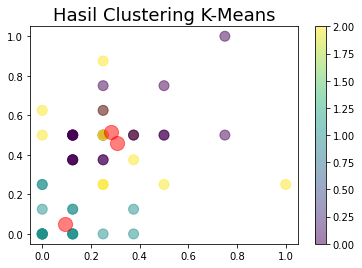

In [72]:
#Memvisualisasi hasil cluster
output = plt.scatter(x_scaled[:,0], x_scaled[:,1], s=100, c=df.cluster, marker="o", alpha=0.5)
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=0.5)
plt.title("Hasil Clustering K-Means", size=18)
plt.colorbar(output)
plt.show()

interpretasi:
merah -> centroid
ungu -> cluster 1
kuning -> cluster 2
hijau -> cluster 3

**K-Medoids**

In [73]:
#Mengelompokkan data menjadi 3 cluster
kmedoids = KMedoids(n_clusters=3, random_state=123)

#Menentukan nilai cluster K dari data
kmedoids.fit(x_scaled)

#Menampilkan centroid
print(kmedoids.cluster_centers_)

[[0.375      0.5        0.57142857]
 [0.125      0.125      0.14285714]
 [0.125      0.5        0.57142857]]


/usr/local/lib/python3.9/dist-packages/sklearn_extra/cluster/_k_medoids.py:275: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(


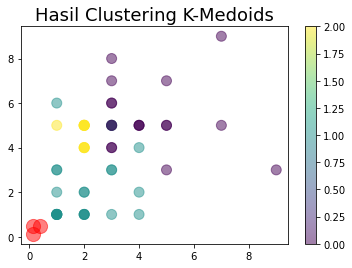

In [74]:
#Memvisualisasi hasil cluster
output = plt.scatter(x_array[:,0], x_array[:,1], s=100, c= kmedoids.labels_, marker = "o", alpha = 0.5)
centers = kmedoids.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=0.5, marker="o")
plt.title("Hasil Clustering K-Medoids", size=18)
plt.colorbar(output)
plt.show()

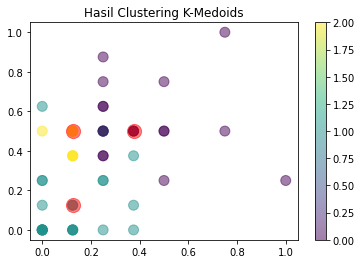

In [75]:
#Menambahkan kolom cluster
df["cluster"] = kmedoids.labels_

#Memvisualisasi hasil cluster
output = plt.scatter(x_scaled[:,0], x_scaled[:,1], s = 100, c= df["cluster"], marker = "o", alpha = 0.5)
centers = kmedoids.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=0.5, marker="o")
plt.title("Hasil Clustering K-Medoids")
plt.colorbar(output)
plt.show()

NOTE: TITIP CEK DATA CSV DGN JURNAL PDF
*ntar bisa dihapus


In [76]:
dataframe

,No.,Inisial,Nama Nasabah,Asuransi Kebakaran,Asuransi Kecelakaan,Asuransi Kesehatan
0,1,P1,Sari Adelia,1,3,2
1,2,P2,Fransiska,1,1,4
2,3,P3,Immanuel,2,4,5
3,4,P4,Lisda,3,3,1
4,5,P5,Mhd. Andy,2,1,4
5,6,P6,Rizka,2,2,1
6,7,P7,Amalia,1,1,1
7,8,P8,Muhammad Yuda,1,5,3
8,9,P9,Wahyu,3,5,2
9,10,P10,Novri,4,2,3


In [77]:
#Output dataframe

In [78]:
cluster_kmeans = df["cluster"].value_counts()
cluster_kmeans

1    25
0    19
2    11
Name: cluster, dtype: int64

In [79]:
kluster_kmedoids = df["cluster"].value_counts()
kluster_kmedoids

1    25
0    19
2    11
Name: cluster, dtype: int64